In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)
%matplotlib inline
!pwd

/home/ikea/GraphLearn/GraphLearn_examples/Abstract


In [43]:
'''
GET RNA DATA
'''
from eden.converter.fasta import fasta_to_sequence
import itertools
from eden.util import random_bipartition_iter
import random

def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)
def rfam_uri(family_id):
    return '%s.fa'%(family_id)
 
    
    
RFAM="mixed"
#cutoff 162 (44.0) 
#cutoff 1725 (38.0)
#cutoff rest (29)


def get_sequences(size=9999,rand=False):
    sequences = get_sequences_with_names(size=size,rand=rand)
    return [ b for (a,b) in sequences ]

def get_sequences_with_names(size=9999, rand=False):
    if rand:
        sequences , boring = random_bipartition_iter(fasta_to_sequence("../toolsdata/%s.fa" % RFAM),.9,random_state=random.random())
        sequences = itertools.islice( sequences , size)
    else:
        sequences = itertools.islice( fasta_to_sequence("../toolsdata/%s.fa" % RFAM), size)
    return sequences




DEMONSTRATING GRAPH MANAGER
grammar example 4


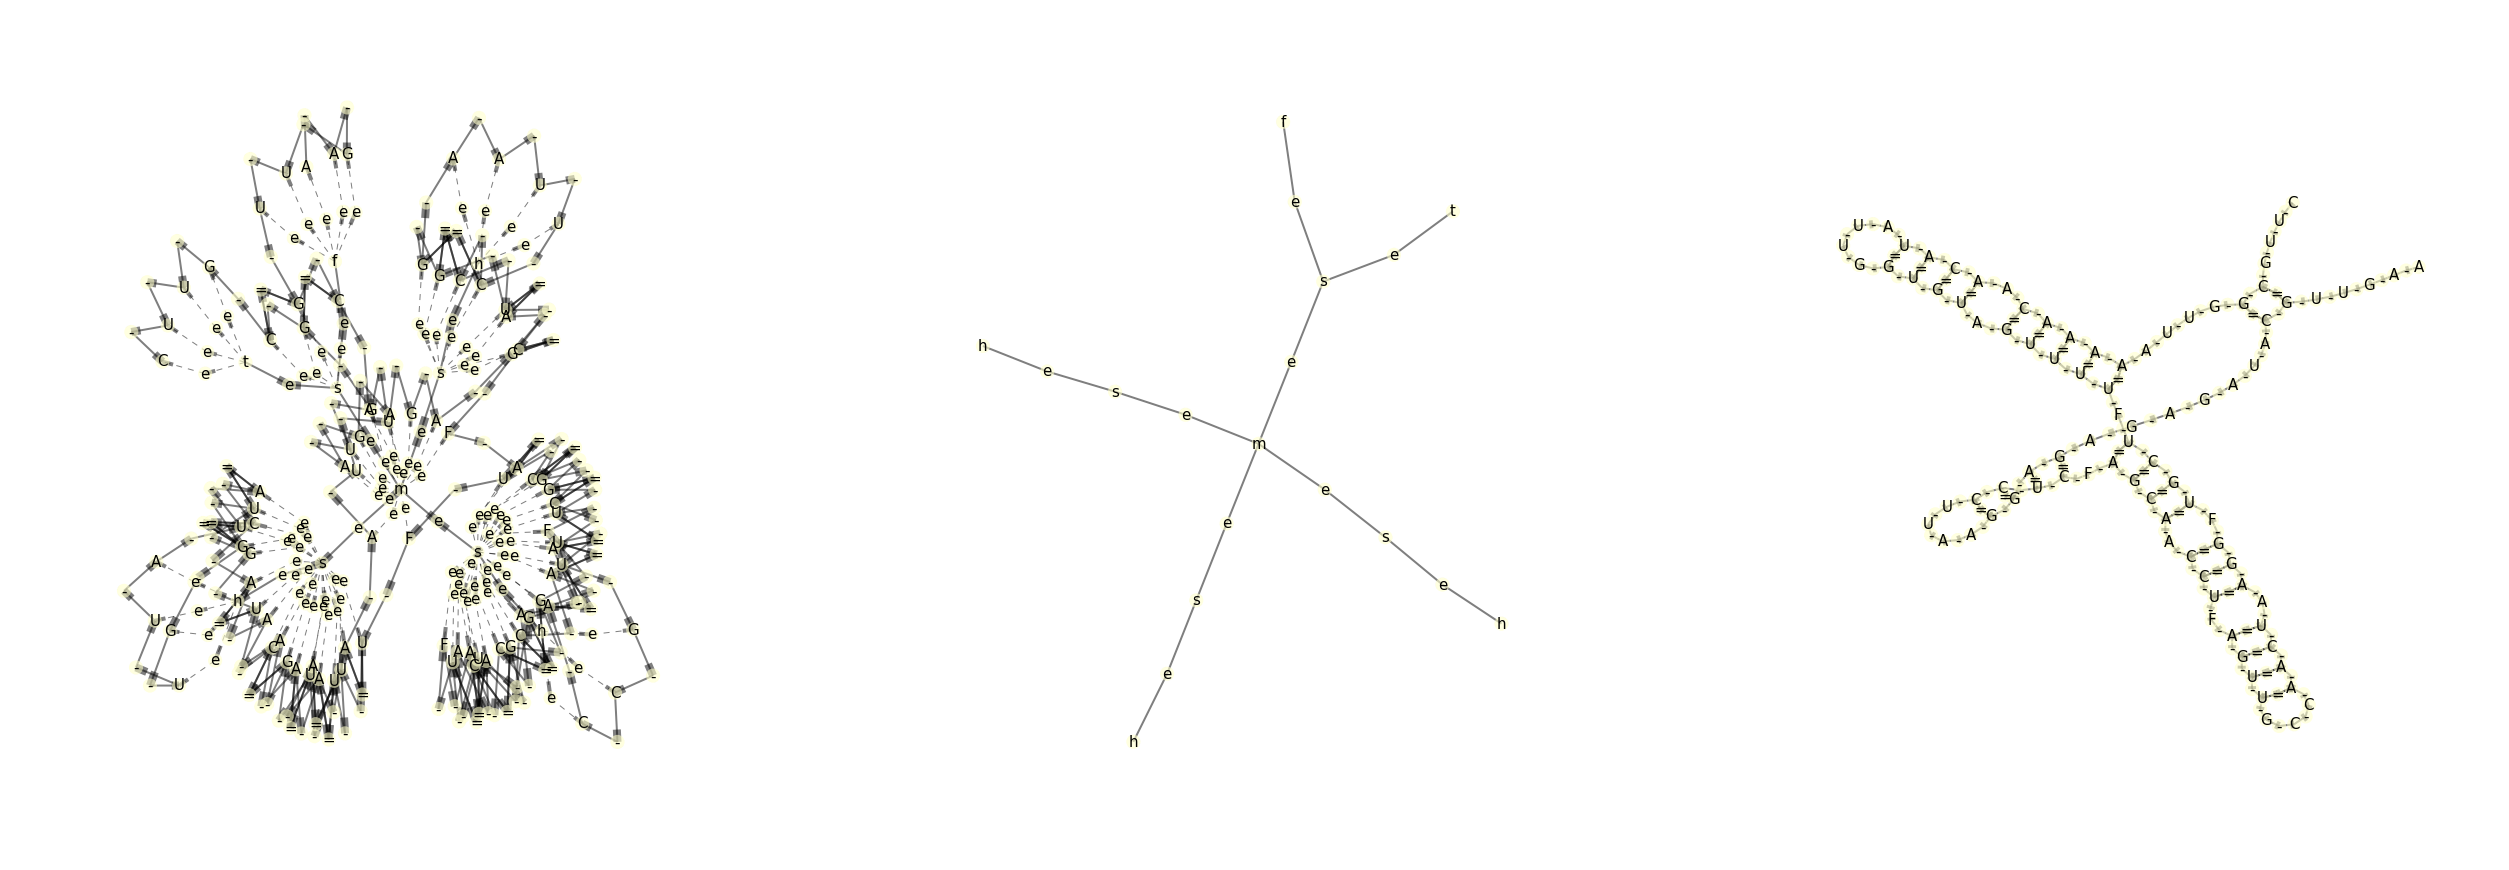

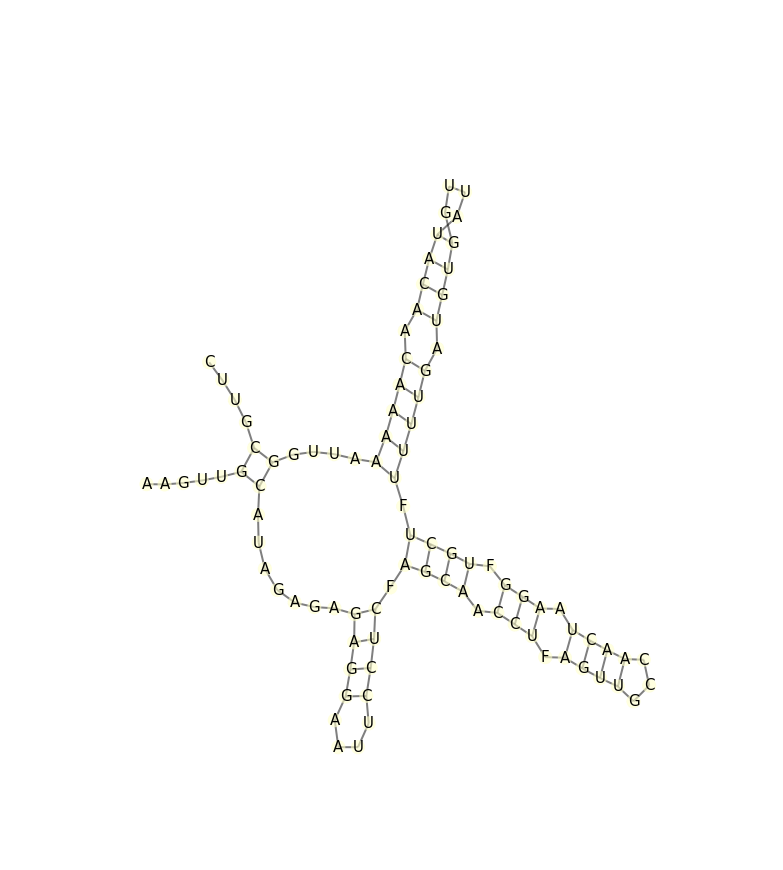

AAGUUGCAUAGAGAGAGGAAUUCCUCFAGCAACCUFAGUUGCCAACUAAGGFUGCUFUUUUGAUGUGGUUAUACAACAAAAAUUGGCGUUC
.....((.......((((....)))).((((.(((.((((...)))).))).)))).(((((.((((....)))).)))))....))....


'\nprint \'DEMONSTRATING EXTRACTION\'  \n#prepare\nradius_list=[0,2]\nthickness_list=[2,4]\nbase_thickness_list=[2]\nf=lambda x, y: True\nd={\'radius_list\':radius_list,\n    \'thickness_list\':thickness_list,\n    \'hash_bitmask\':2**20-1,\n    \'node_filter\': f}\n\n\n#draw.graphlearn([gm.abstract_graph(),gm.base_graph()], size = 15,vertex_label = \'id\',contract=True)\ncips=gm.all_core_interface_pairs(**d)\nfor li, ciplist in enumerate(cips):\n    for entry, cip in enumerate(ciplist):\n        continue\n        z=\'list: %d ; entry: %d\' % (li,entry)\n        #cip.graph.graph[\'info\']=z\n        draw.graphlearn([cip.graph,cip.abstract_view], size=4, contract=True) \ncipz=[cips[2][3],cips[1][3],cips[1][2]]\ngraphz=[[c.graph,c.abstract_view] for c in cipz]\n    \n#g=gm.graph(nested=False)\n#print \'test\', g.nodes(data=True)[0][1]\n\n#for graphpair in graphz:\n#    draw.graphlearn(graphpair, size=10,font_size=36,# secondary_vertex_label=\'ID\',\n#                   colormap=\'Paired\

In [44]:
'''TESTING EXTRACTION AND GRAPHMANAGER'''
from graphlearn.utils import draw
import graphlearn.abstract_graphs.RNA as rna
from graphlearn.graphlearn import Sampler as GLS
from eden.graph import Vectorizer

vectorizer=Vectorizer()
pp=rna.PreProcessor(ignore_inserts=True)
pp.fit(get_sequences_with_names(),vectorizer)
graphmanagers=pp.transform(get_sequences()[:20])

print 'DEMONSTRATING GRAPH MANAGER'

for i in [4]:
    print 'grammar example %d' % i
    gm=graphmanagers[i]
    g=gm.graph(nested=True)
    #print g.nodes(data=True)
    #g.node[0].pop('weight')
    # jump because we do the thesis now
    #vec=vectorizer.transform_single(g)
    draw.graphlearn([gm.graph(nested=True),gm.abstract_graph(),gm.base_graph()], size = 15,vertex_label = 'label',contract=False)
    draw.graphlearn([gm.base_graph()], size = 15,vertex_label = 'label',contract=True)
    
    print gm.sequence
    print gm.structure
    
    
    
    
'''
print 'DEMONSTRATING EXTRACTION'  
#prepare
radius_list=[0,2]
thickness_list=[2,4]
base_thickness_list=[2]
f=lambda x, y: True
d={'radius_list':radius_list,
    'thickness_list':thickness_list,
    'hash_bitmask':2**20-1,
    'node_filter': f}


#draw.graphlearn([gm.abstract_graph(),gm.base_graph()], size = 15,vertex_label = 'id',contract=True)
cips=gm.all_core_interface_pairs(**d)
for li, ciplist in enumerate(cips):
    for entry, cip in enumerate(ciplist):
        continue
        z='list: %d ; entry: %d' % (li,entry)
        #cip.graph.graph['info']=z
        draw.graphlearn([cip.graph,cip.abstract_view], size=4, contract=True) 
cipz=[cips[2][3],cips[1][3],cips[1][2]]
graphz=[[c.graph,c.abstract_view] for c in cipz]
    
#g=gm.graph(nested=False)
#print 'test', g.nodes(data=True)[0][1]

#for graphpair in graphz:
#    draw.graphlearn(graphpair, size=10,font_size=36,# secondary_vertex_label='ID',
#                   colormap='Paired', invert_colormap=False,node_border=0.5,contract=True,
#                   vertex_alpha=0.5, node_size=1900)
    
    
    
minor = gm.abstract_graph()
minorcip = graphz[0][1]

def wire(g,nset=[]):
    for n in nset:
        z=str(n)
        g.add_edge("+"+z,"-"+z,nesting=True,weight='.2',len=2)
        
draw.graphlearn([minor,minorcip], size=10,font_size=36,# secondary_vertex_label='ID',
                   colormap='Paired', invert_colormap=False,node_border=0.5,contract=True,
                   vertex_alpha=0.5, node_size=1900)
#[minor,minorcip]

def colorize(g,c1=[],c2=[],c3=[],label='mycolors'):
    for n,d in g.nodes(data=True):
        if n in c1:
            d[label]='#C88A68' #reddish
        elif n in c2: 
            d[label]='#FAF4B0' # yellow
        elif n in c3:
            d[label]='#C9BC24' # dark yellow
        else:
            d[label]='#C1DDEB' # default color -- blueish

colorize(minor,c1=[2,3],c2=[5,9,10,0],c3=[])
colorize(minorcip,c1=[2,3],c2=[5,9,10,0],c3=[])
#g3=draw.cip_to_drawable_graph(cips=[cips[2][3]], graphs=[minor])

draw.graphlearn([minor,minorcip], size=10,font_size=36, #secondary_vertex_label='id',
                    contract=True,
                   colormap='Paired', invert_colormap=False,node_border=0.5,vertex_color='mycolors',
                   vertex_alpha=0.5, node_size=1900)
'''

In [45]:
%%time
'''
learning a grammar
'''
import graphlearn.abstract_graphs.RNA as rna
from  graphlearn.feasibility import FeasibilityChecker as Checker
import graphlearn.estimator as estimator


graphs = get_sequences_with_names(size=200,rand=True)
graphs = list(graphs)
estimator=estimator.Wrapper( nu=.33, cv=2, n_jobs=-1)
sampler=rna.AbstractSampler(radius_list=[0,1],
                            thickness_list=[2], 
                            min_cip_count=1, 
                            min_interface_count=2, 
                            preprocessor=rna.PreProcessor(base_thickness_list=[1],ignore_inserts=True), 
                            postprocessor=rna.PostProcessor(),
                            estimator=estimator
                            #feasibility_checker=feasibility
                           )
sampler.fit(graphs,grammar_n_jobs=1,grammar_batch_size=1)
sampler.save('../tmp/rna_ubergrammar.ge')


CPU times: user 3min 4s, sys: 25.9 s, total: 3min 30s
Wall time: 6min 18s


interface id: 984767 [99 options]


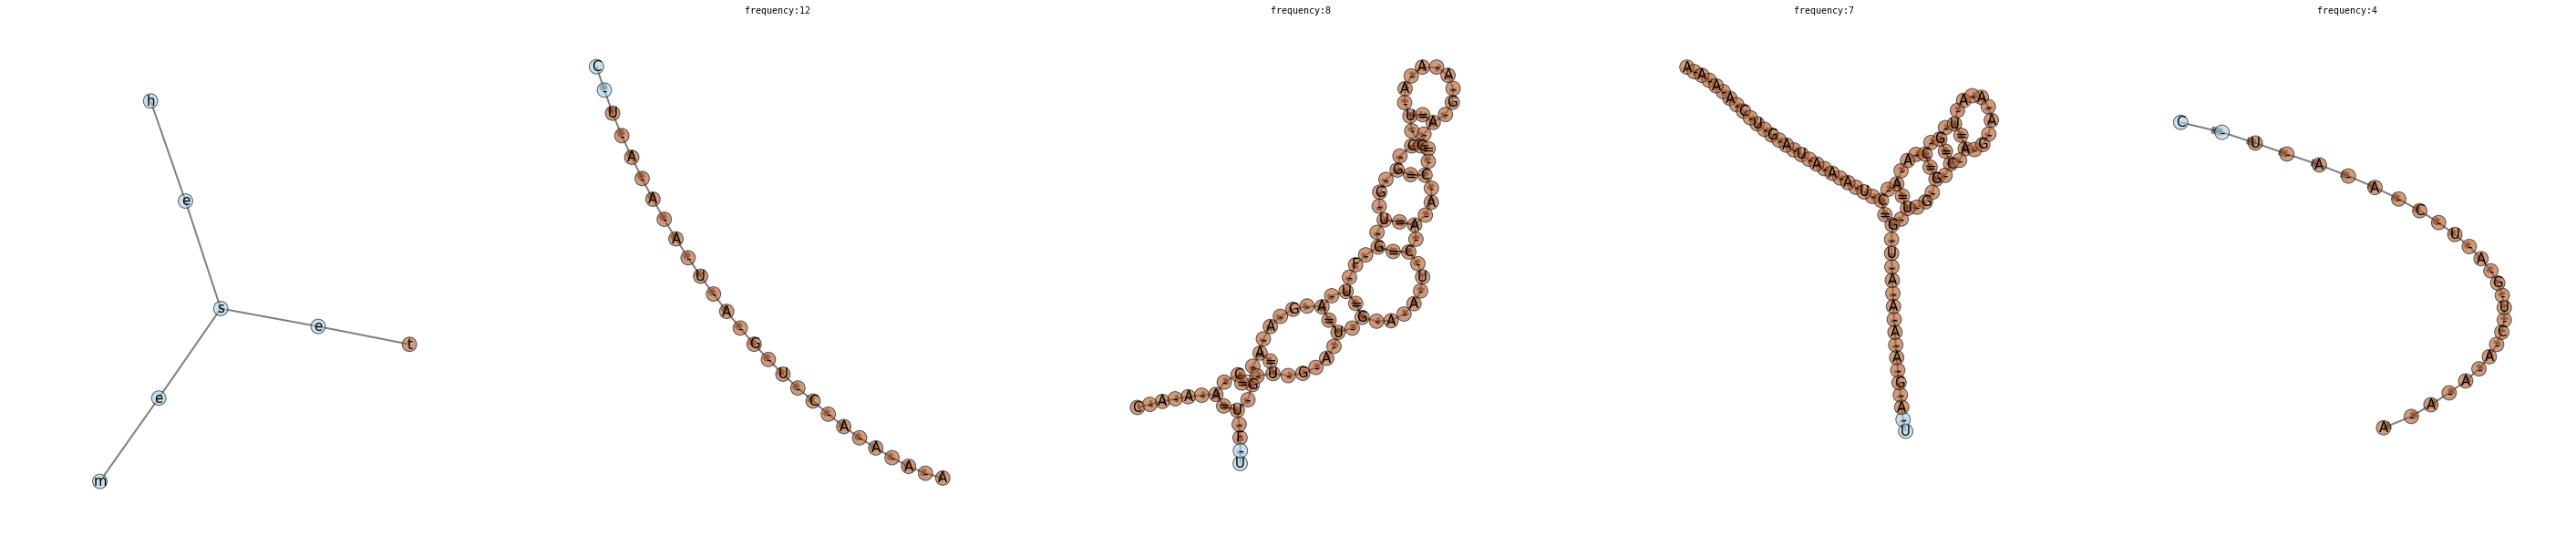

interface id: 192835 [74 options]


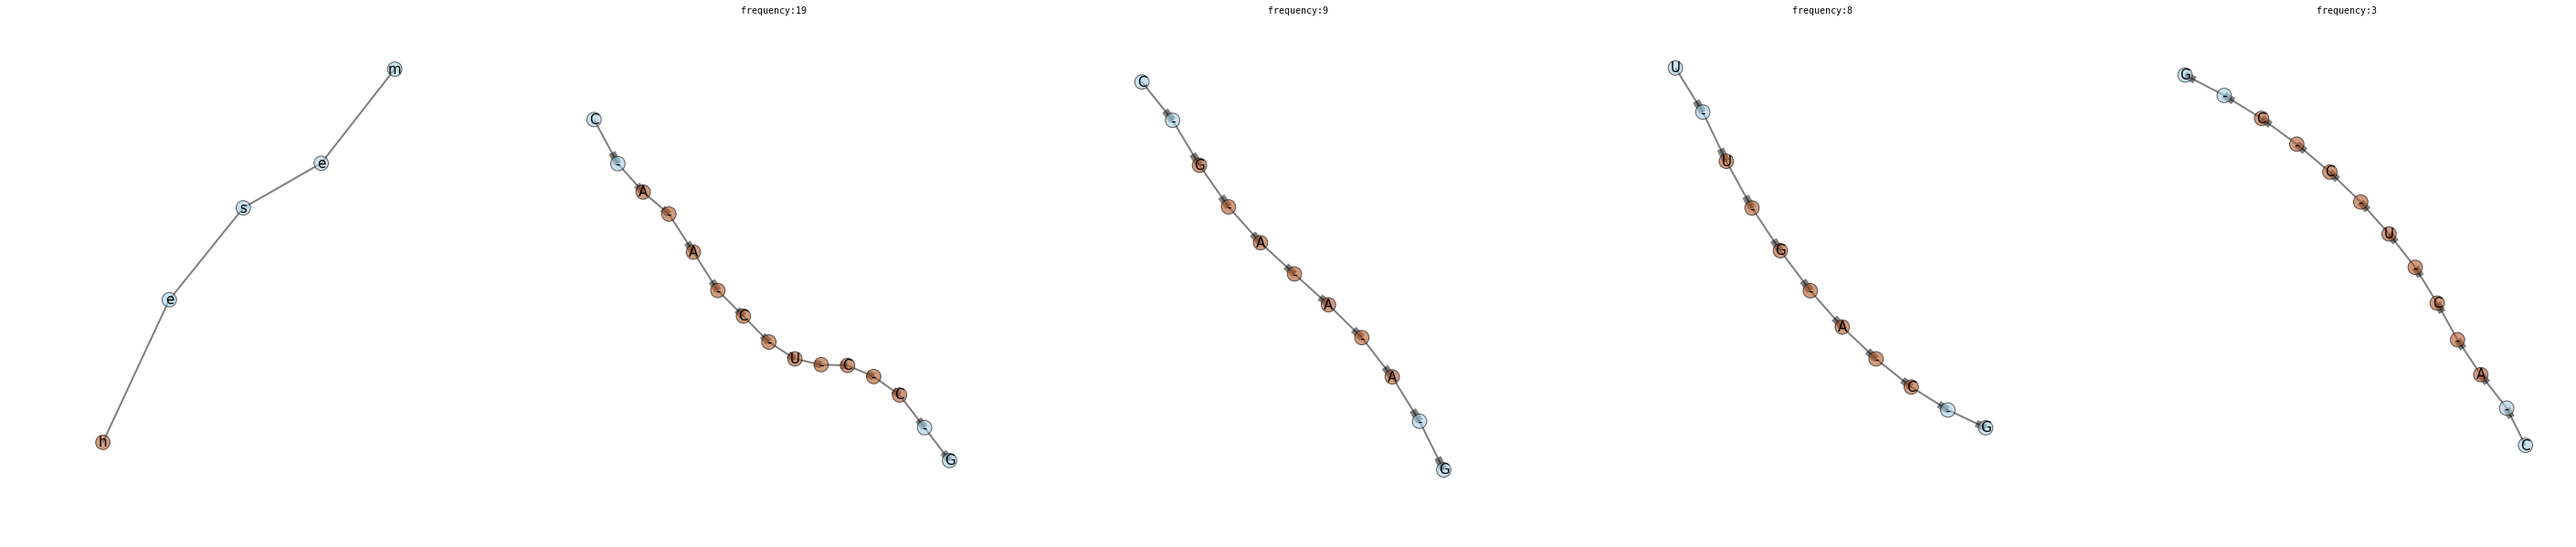

interface id: 25439 [60 options]


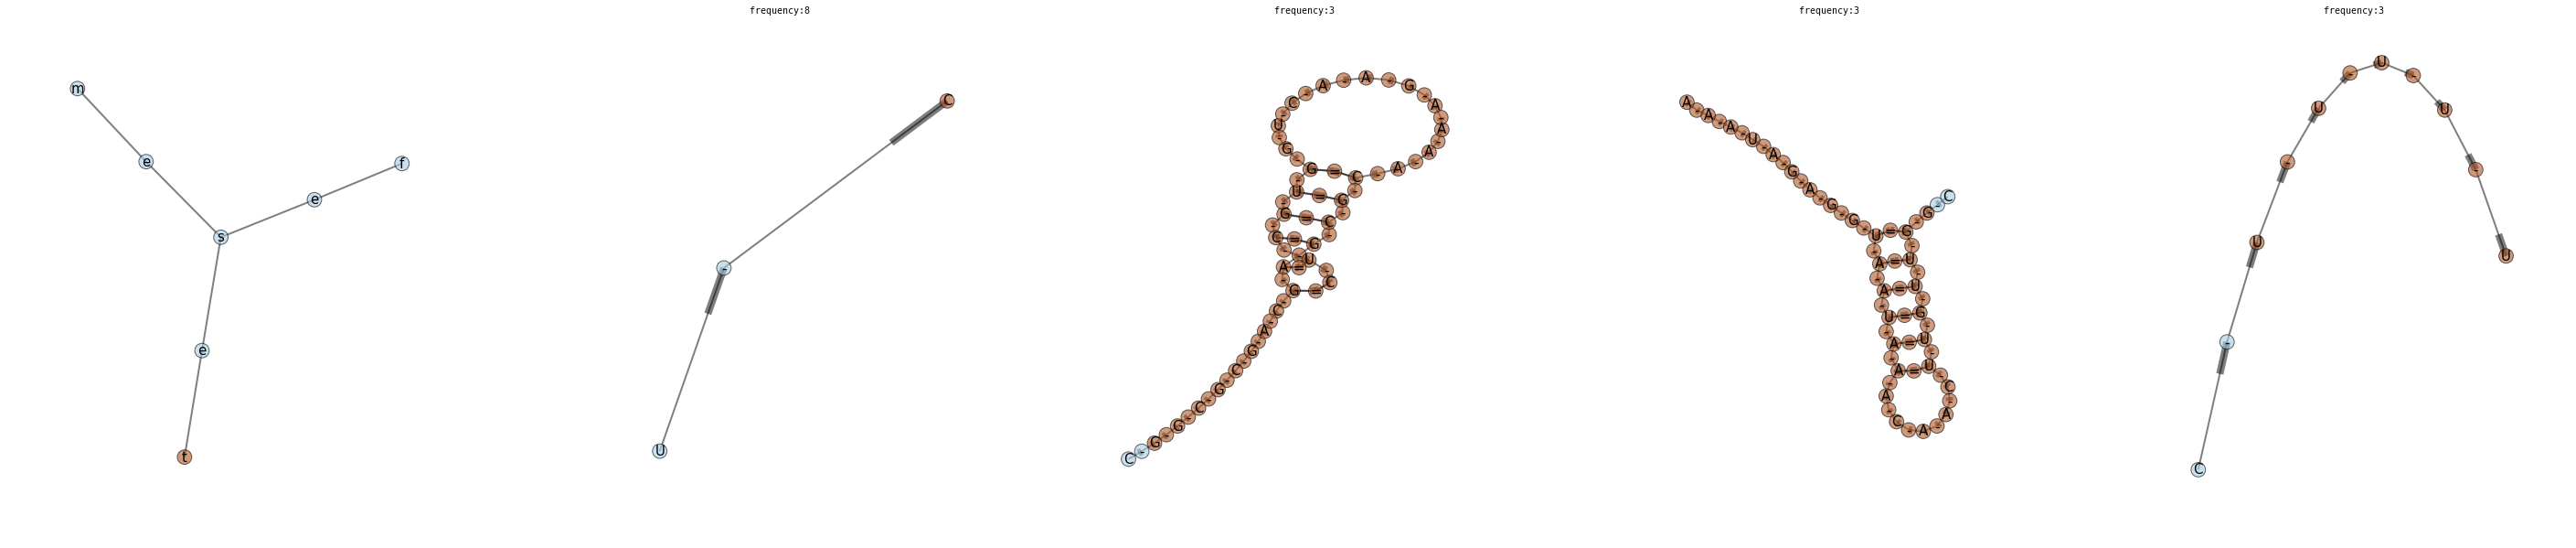

interface id: 733955 [45 options]


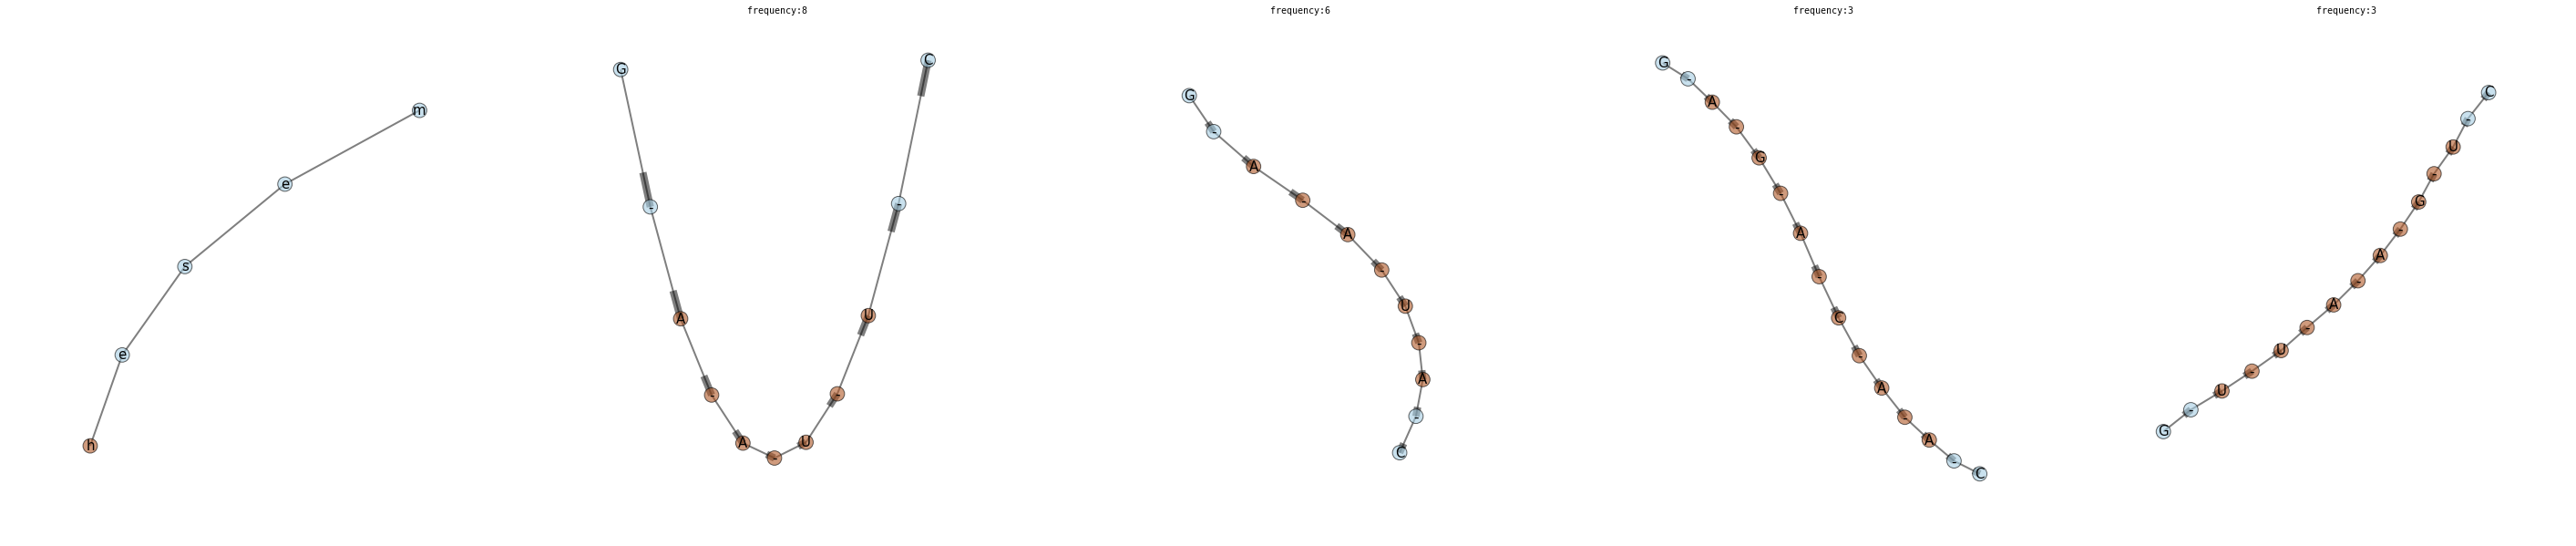

interface id: 900287 [35 options]


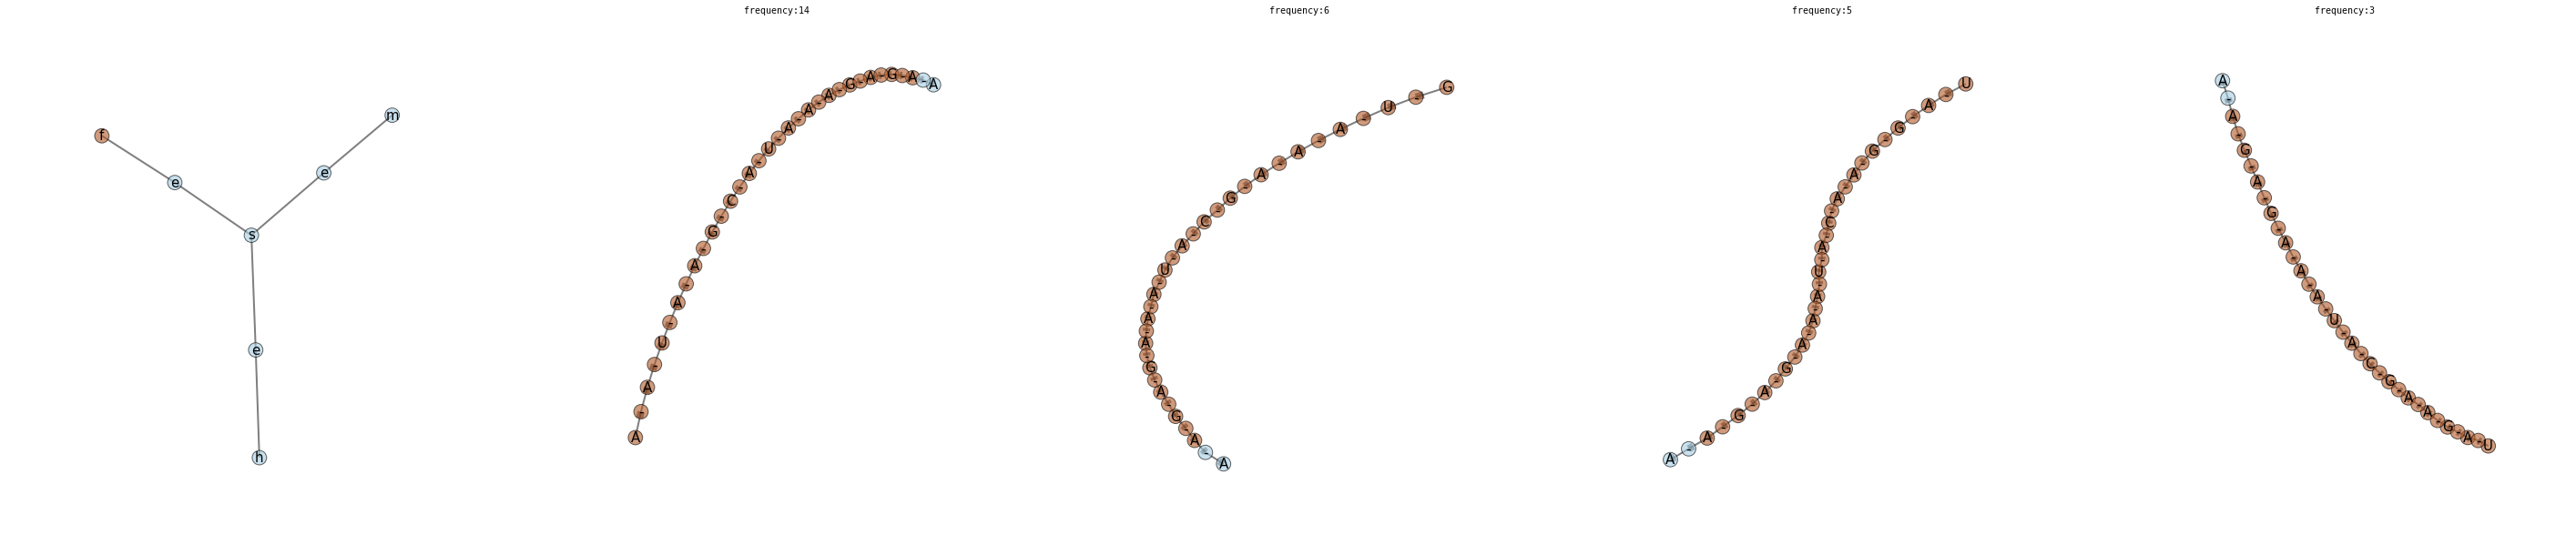

In [46]:
#draw production rules
draw.draw_grammar(sampler.lsgg.productions,n_productions=5,n_graphs_per_production=5,
                     n_graphs_per_line=6, size=10, contract=False,
                     colormap='Paired', invert_colormap=False,node_border=1,
                     vertex_alpha=0.6, edge_alpha=0.5, node_size=250, abstract_interface=True)

    

In [47]:
%%time
'''
Rna sampling
'''
import os
os.nice(19)
import graphlearn.utils.draw as draw
import graphlearn.abstract_graphs.RNA as rna
from graphlearn.graphlearn import Sampler as GLS
import itertools
#sampler=rna.AbstractSampler(radius_list=[0,1],thickness_list=[2], min_cip_count=1, min_interface_count=2, preprocessor=rna.PreProcessor(), postprocessor=rna.PostProcessor())
#sampler.load('tmp/rna_ubergrammar.ge')


#graphs = get_sequences()
graphs = [ b for a ,b in graphs  ]
id_start=66
id_end=id_start+12
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=50

graphs = sampler.sample(graphs,
                        n_samples=3,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=4,
                        quick_skip_orig_cip=True,
                        probabilistic_core_choice=True,
                        burnin=0,
                        improving_threshold=0.9,
                        improving_linear_start=0.3,
                        max_size_diff=20,
                        accept_min_similarity=0.65,
                        select_cip_max_tries=30,
                        keep_duplicates=False,
                        include_seed=True,
                        backtrack=10,
                        monitor=True)


from eden.modifier.graph.vertex_attributes import colorize   
scores=[]
sequences=[]
ids=range(id_start,id_end)
for i,graphlist in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(sampler.monitors[i].sampling_info['score_history'])
    
    sequences.append(sampler.monitors[i].sampling_info['notes'])
    
    path_graphs = colorize(graphlist,
                           output_attribute = 'color_level', 
                           labels = ['A','U','G','C'])
    path_graphs= list(path_graphs)
    #draw.graphlearn(path_graphs,
    #                       n_graphs_per_line=3, size=20, 
    #                       colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
    #                       vertex_alpha=0.5, edge_alpha=0.7, node_size=450,edge_label='label' )


Graph id: 66
Graph id: 67
Graph id: 68
Graph id: 69
Graph id: 70
Graph id: 71
Graph id: 72
Graph id: 73
Graph id: 74
Graph id: 75
Graph id: 76
Graph id: 77
CPU times: user 6.86 s, sys: 6.66 s, total: 13.5 s
Wall time: 3min 21s


In [48]:
'''
%matplotlib inline
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt

step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()
    
'''
    
    

"\n%matplotlib inline\nfrom itertools import islice\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nstep=1\nnum_graphs_per_plot=3\nnum_plots=np.ceil([len(scores)/num_graphs_per_plot])\nfor i in range(num_plots):\n    plt.figure(figsize=(10,5))\n    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):\n        data = list(islice(score,None, None, step))\n        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))\n    plt.legend(loc='lower right')\n    plt.grid()\n    plt.ylim(-0.1,1.1)\n    plt.show()\n    \n"

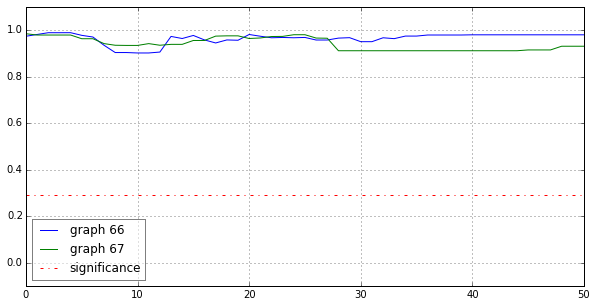

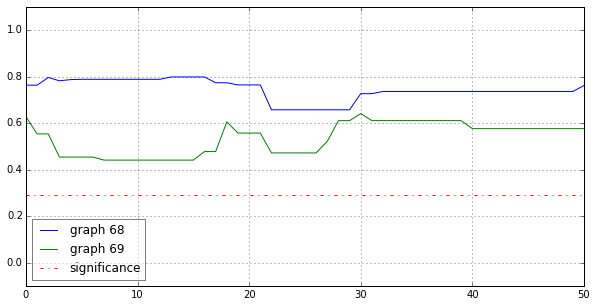

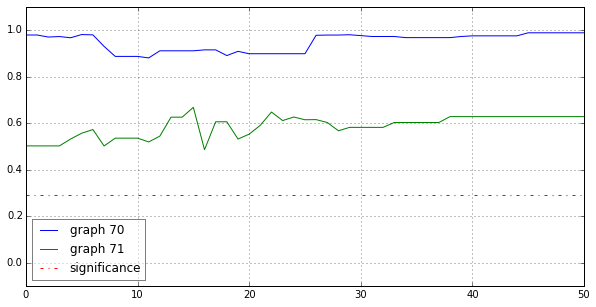

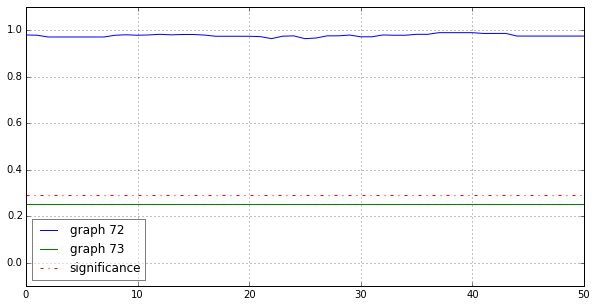

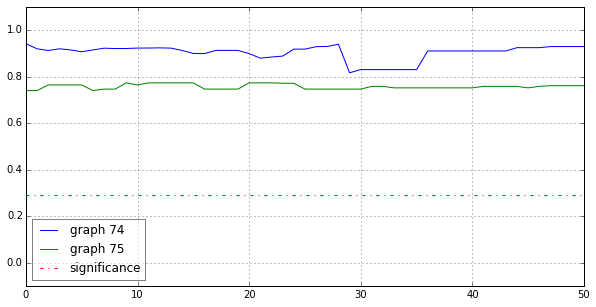

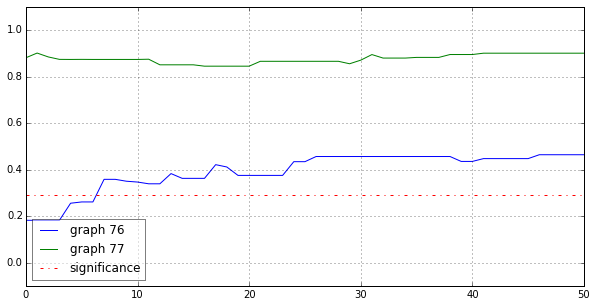

In [49]:
'''
draw the score history for each of the graphs
'''
colors=['b','g','r','c','m','y','k','w']

%matplotlib inline
from itertools import islice
import matplotlib.pyplot as plt
import numpy as np
step=1
num_graphs_per_plot=2
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data,ls='-',color=colors[j], label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        '''
        # okok now we need to add the infernal evaluation
        seqs=sequences[i*num_graphs_per_plot+j]
        seqs=seqs.split('n')
        
        # SEQUENCES STILL CONTAIN F, ALSO THERE ARE ERRORMESSAGES AT THE END OF INFO
        #seqs=seqs[:-1]
    
        
        data2= rna.infernal_checker(seqs,cmfile='../RF00162.cm')
        plt.plot(data2,ls='--',color=colors[j], label='infernal %d'%(j+i*num_graphs_per_plot+id_start))
        '''
    plt.plot([0.29]*len(data2),ls='-.',color='r', label='significance') #| '-' | '--' | '-.' | ':' | 'None' | ' ' |
    plt.legend(loc='lower left',framealpha=0.5)
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

In [50]:
import graphlearn.abstract_graphs.RNA as rna
import graphlearn.utils.draw as draw

#faillist=[0,2,4,5]
# for every failed graph

runs=[]
for i,mon in enumerate(sampler.monitors):
    lastgraph=None
    run=[]
    for t,graphs in mon.format(start=0):
        if lastgraph!=None:
            v=sampler.vectorizer.similarity([graphs[0].copy()],lastgraph).next()
            
            run.append(v)
        lastgraph=graphs[0]
    runs.append(run)
import numpy
for run in runs:
    a= numpy.array(run)
    print numpy.mean(a, axis=0),' ',numpy.std(a, axis=0)
    
    
    '''
    if len(mon.content) < 80:
        for t,graphs in mon.format(start=0):
            # print relevant info

            draw.graphlearn(graphs,size=6,node_border=.5)

            lastgraph=graphs[0]
            
        print "#"*80
        print "#"*80
        break
            #print monentry['graphwrapper'].sequence
            #print monentry['graphwrapper'].structure
            
            
            
            
            

In [18]: arr =

In [20]: numpy.mean(arr, axis=0)
Out[20]: 
array([ 0.7       ,  2.2       ,  1.8       ,  2.13333333,  3.36666667,
        5.1       ])

In [21]: numpy.std(arr, axis=0)
Out[21]: 
array([ 0.45460606,  1.29614814,  1.37355985,  1.50628314,  1.15566239,
        1.2083046 ])
    '''

0.952030621552   0.0444882625743
0.955153100787   0.0368393330256
0.876544993458   0.0804881703112
0.917574690381   0.0370909169271
0.928413870831   0.0523008762506
0.913606787275   0.0618796790619
0.947842573932   0.0293128797801
nan   nan
0.933170572966   0.0468966715579
0.924798142321   0.0243152451435
0.955048279916   0.0328820984004
0.916489604678   0.0616109258914
